In [2]:
import pandas as pd
import numpy as np
import re
import glob
import math
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(12, 8)})
sns.set(font_scale = 1.3)

In [2]:
# Since the collider names are too detailed, here we create a dictionary with patterns to classify them into our categories of interest
patterns = {'\d{2}_Sa':'Passive_Agent', '\d{2}_Cma':'Active_Agent', 'Building_\d+': 'Building'}
patterns.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))
patterns.update(dict.fromkeys(['TaskBuilding_2','TaskBuilding_3', 'TaskBuilding_5', 'TaskBuilding_8', 'TaskBuilding_9', 'TaskBuilding_11', 'TaskBuilding_13', 'TaskBuilding_14', 'TaskBuilding_20', 'TaskBuilding_21', 'TaskBuilding_23','TaskBuilding_27', 'TaskBuilding_29', 'TaskBuilding_32', 'TaskBuilding_34',  'TaskBuilding_38', 'TaskBuilding_41', 'TaskBuilding_42', 'TaskBuilding_44', 'TaskBuilding_45', 'TaskBuilding_47', 'TaskBuilding_50', 'TaskBuilding_51', 'TaskBuilding_52', 'BasketballCourt_58', 'Construction_57', 'Graffity_02', 'Graffity_03', 'Graffity_05', 'Graffity_08', 'Graffity_09', 'Graffity_11', 'Graffity_13', 'Graffity_14', 'Graffity_20', 'Graffity_21', 'Graffity_23', 'Graffity_27', 'Graffity_29', 'Graffity_32', 'Graffity_34', 'Graffity_38', 'Graffity_41', 'Graffity_42', 'Graffity_44', 'Graffity_45', 'Graffity_47',  'Graffity_50', 'Graffity_51', 'Graffity_52'], 'TaskBuilding_Public'))
patterns.update(dict.fromkeys(['TaskBuilding_1','TaskBuilding_4', 'TaskBuilding_6', 'TaskBuilding_7', 'TaskBuilding_12', 'TaskBuilding_15', 'TaskBuilding_17', 'TaskBuilding_18', 'TaskBuilding_19', 'TaskBuilding_22', 'TaskBuilding_24','TaskBuilding_25', 'TaskBuilding_26', 'TaskBuilding_28', 'TaskBuilding_30',  'TaskBuilding_31', 'TaskBuilding_33', 'TaskBuilding_35', 'TaskBuilding_36', 'TaskBuilding_37', 'TaskBuilding_39', 'TaskBuilding_40', 'TaskBuilding_43', 'TaskBuilding_48', 'TaskBuilding_54','TaskBuilding_55','Graffity_01','Graffity_04', 'Graffity_06', 'Graffity_07', 'Graffity_12', 'Graffity_15', 'Graffity_17', 'Graffity_18', 'Graffity_19', 'Graffity_22', 'Graffity_24','Graffity_25', 'Graffity_26', 'Graffity_28', 'Graffity_30',  'Graffity_31', 'Graffity_33', 'Graffity_35', 'Graffity_36', 'Graffity_37', 'Graffity_39', 'Graffity_40', 'Graffity_43', 'Graffity_48', 'Graffity_54', 'Graffity_55' ], 'TaskBuilding_Residential'))
default_val = 'Background'

In [3]:
path = "/Volumes/SSD/00_Data_Processing/Pre_processed/05_Debbies_gaze" 

  
# csv files in the path
files = glob.glob(path + "/*.csv")
  
# defining an empty list to store 
# content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the 
# specified path
for filename in files:
    
    # reading content of csv file
    # content.append(filename)
    One_participant = pd.read_csv(filename)
    One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)
    One_participant['Collider_CategoricalN'] = One_participant['names'].apply(lambda x: next((val for key, val in patterns.items() if re.match(key, x)), default_val))
    print(filename[-10:-4])
    content.append(One_participant)

# converting content to data frame
data_frame = pd.concat(content)

0479_2
0479_3
0479_5
1754_1
1754_2
1754_3
1754_4
1754_5
2258_1
2258_2
2258_3
2258_4
2258_5
2361_2
2361_3
2361_4
2361_5
2693_1
2693_2
2693_3
2693_4
2693_5
3246_1
3246_2
3246_3
3246_5
3310_1
3310_2
3310_3
3310_4
3310_5
3572_1
3572_2
3572_3
3572_4
3976_1
3976_2
3976_3
3976_4
3976_5
4176_1
4176_2
4176_3
4176_4
4176_5
4796_1
4796_2
4796_3
4796_4
4796_5
4917_1
4917_2
4917_3
4917_4
4917_5
5238_1
5238_2
5238_3
5238_4
5531_1
5531_3
5531_4
5531_5
5741_1
5741_2
5741_3
5741_4
5741_5
6642_1
6642_2
6642_3
6642_4
6642_5
7093_1
7093_2
7093_3
7093_4
7093_5
7264_1
7264_2
7264_3
7264_4
7264_5
7412_1
7412_2
7412_3
7412_4
7412_5
7842_1
7842_2
7842_3
7842_4
7842_5
8007_1
8007_2
8007_3
8007_4
8007_5
8469_1
8469_2
8469_3
8469_4
8469_5
8673_1
8673_2
8673_3
8673_4
8673_5
8695_2
8695_3
8695_4
8695_5
9472_1
9472_2
9472_3
9472_4
9472_5
9502_1
9502_2
9502_3
9502_5
9601_1
9601_2
9601_3
9601_4
9601_5
0479_1


In [4]:
data_frame_gaze = data_frame[data_frame.events == -2].copy()

In [33]:
data_frame_gaze.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [5]:
data_frame_gaze.head()

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,combined_vel,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN
2,2,479,2,1,1.653045e+09,3,-59.116348,2.260123,34.715347,0.038935,...,0.000000,27.130421,0.000000,NaN,-2.0,0.006447,62.707432,62.707432,Building_161,Building
19,19,479,2,1,1.653045e+09,3,-59.106937,2.260705,34.714581,0.025481,...,2.815348,27.130421,2.815348,2.815348,-2.0,0.254944,62.709146,62.709424,Building_161,Building
45,45,479,2,1,1.653045e+09,3,-59.114811,2.260359,34.713730,0.002027,...,0.709226,27.130421,0.709226,0.709226,-2.0,0.389361,56.725614,56.725701,Fence_34,Background
51,51,479,2,1,1.653045e+09,3,-59.128338,2.259566,34.713692,-0.063595,...,0.836695,27.130421,0.836695,0.836695,-2.0,0.066463,22.469910,22.470188,terrain_O.001,Background
55,55,479,2,1,1.653045e+09,3,-59.111675,2.260061,34.713726,-0.063207,...,21.173582,27.130421,21.173582,21.173582,-2.0,0.044640,21.422642,21.422655,terrain_O.001,Background


In [6]:
data_frame.tail(200)

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,combined_vel,thresh,isFix,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN
114358,114358,479,1,3,1.652970e+09,3,194.029144,0.963270,112.117889,0.012810,...,15.008259,27.123903,15.008259,15.008259,NaN,0.188480,30.379239,30.387788,TaskBuilding_14,TaskBuilding_Public
114359,114359,479,1,3,1.652970e+09,3,194.029144,0.963270,112.117416,0.013783,...,26.045621,27.123903,26.045621,26.045621,NaN,0.188480,30.379362,30.387788,TaskBuilding_14,TaskBuilding_Public
114360,114360,479,1,3,1.652970e+09,3,194.016617,0.963007,112.117325,0.015348,...,0.000000,27.123903,0.000000,0.000000,NaN,0.188480,30.391487,30.387788,TaskBuilding_14,TaskBuilding_Public
114361,114361,479,1,3,1.652970e+09,3,194.016617,0.963007,112.116272,0.023475,...,23.781373,27.123903,23.781373,23.781373,NaN,0.188480,30.391760,30.387788,TaskBuilding_14,TaskBuilding_Public
114362,114362,479,1,3,1.652970e+09,3,194.016617,0.963007,112.115677,0.023176,...,24.174312,27.123903,24.174312,24.174312,NaN,0.188480,30.391914,30.387788,TaskBuilding_14,TaskBuilding_Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114553,114553,479,1,3,1.652970e+09,3,192.045654,0.856509,117.302483,-0.070025,...,3.100830,27.123903,3.100830,3.100830,NaN,0.377951,30.246194,30.759764,pavement_Ua6.001,Background
114554,114554,479,1,3,1.652970e+09,3,191.983978,0.854405,117.395813,-0.070558,...,1.497412,27.123903,1.497412,1.497412,NaN,0.377951,30.134844,30.759764,pavement_Ua6.001,Background
114555,114555,479,1,3,1.652970e+09,3,191.920563,0.852232,117.488960,-0.069931,...,4.626266,27.123903,4.626266,4.626266,NaN,0.377951,30.022820,30.759764,pavement_Ua6.001,Background
114556,114556,479,1,3,1.652970e+09,3,191.920563,0.852232,117.488960,-0.070915,...,0.000000,27.123903,0.000000,0.000000,NaN,0.377951,30.022820,30.759764,pavement_Ua6.001,Background


In [7]:
data_frame.iloc[114348:114378,[21,34]]

,hitObjectColliderName,Interpolated_collider
114348,road_playground.002,road_playground.002
114349,terrain_I.001,terrain_I.001
114350,terrain_I.001,terrain_I.001
114351,terrain_I.001,terrain_I.001
114352,terrain_I.001,terrain_I.001
114353,road_playground.002,road_playground.002
114354,terrain_I.001,terrain_I.001
114355,terrain_I.001,terrain_I.001
114356,terrain_I.001,terrain_I.001
114357,terrain_I.001,terrain_I.001


In [8]:
data_frame.combinedGazeValidityBitmask.value_counts()

3    13240677
0      836959
Name: combinedGazeValidityBitmask, dtype: int64

In [9]:
Blinks = pd.DataFrame(data_frame.groupby(["SubjectID", "Session"])["combinedGazeValidityBitmask"].value_counts(normalize=True))
Blinks.rename(columns ={"combinedGazeValidityBitmask": "Percentage"}, inplace=True)
Blinks.reset_index(inplace=True)
Blinks.loc[:, 'Validity'] = Blinks['combinedGazeValidityBitmask'].replace( {3:"Valid", 0:"Invalid"})

In [10]:
Blinks.head()

,SubjectID,Session,combinedGazeValidityBitmask,Percentage,Validity
0,479,1,3,0.966297,Valid
1,479,1,0,0.033703,Invalid
2,479,2,3,0.963621,Valid
3,479,2,0,0.036379,Invalid
4,479,3,3,0.934566,Valid


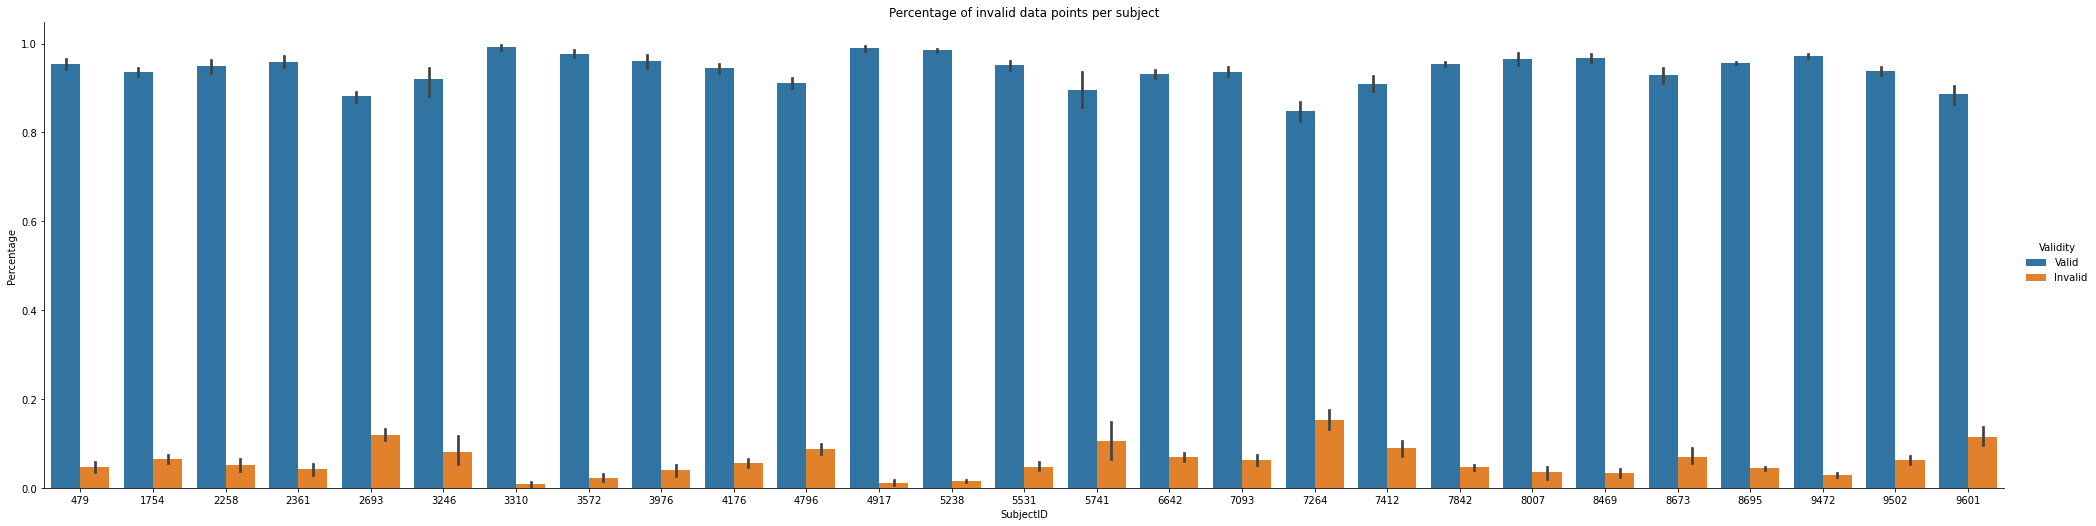

In [11]:
sns.catplot(data=Blinks, hue="Validity", y="Percentage", x="SubjectID", kind="bar", \
            height=7, aspect=4).set(title="Percentage of invalid data points per subject")

In [12]:
data_frame.Continuous_Time.describe()

count    1.407764e+07
mean     1.649533e-02
std      1.390423e-02
min      0.000000e+00
25%      0.000000e+00
50%      1.700000e-02
75%      3.300000e-02
max      5.000000e-02
Name: Continuous_Time, dtype: float64

In [13]:
data_frame_gaze["Median_Standard_Duration"] = np.nanmedian(abs(data_frame_gaze.length - np.nanmedian(data_frame_gaze.length))) * 1.4826
data_frame_gaze["gaze_mad_z"] = abs(data_frame_gaze.length.tolist() - np.nanmedian(data_frame_gaze.length)) / data_frame_gaze.Median_Standard_Duration.tolist()
data_frame_gaze["Outlier_Gaze_Length"] = np.where(data_frame_gaze["gaze_mad_z"] > 3.5, "Out", "Stays")
data_frame_gaze_no_out = data_frame_gaze[data_frame_gaze.Outlier_Gaze_Length != "OUT"]
data_frame_gaze_no_out.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV_NO_Outliers.cvs")

In [34]:
data_frame_gaze_no_out.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV_NO_Outliers.cvs")

In [14]:
data_frame_gaze.Outlier_Gaze_Length.value_counts(normalize=True)

Stays    0.949343
Out      0.050657
Name: Outlier_Gaze_Length, dtype: float64

In [15]:
data_frame_gaze.shape

(721643, 53)

In [16]:
data_frame_gaze_no_out.shape

(721643, 53)

In [17]:
data_frame_gaze_no_out.head()

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,corrected_vel,events,length,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length
2,2,479,2,1,1.653045e+09,3,-59.116348,2.260123,34.715347,0.038935,...,NaN,-2.0,0.006447,62.707432,62.707432,Building_161,Building,0.116925,1.272624,Stays
19,19,479,2,1,1.653045e+09,3,-59.106937,2.260705,34.714581,0.025481,...,2.815348,-2.0,0.254944,62.709146,62.709424,Building_161,Building,0.116925,0.852645,Stays
45,45,479,2,1,1.653045e+09,3,-59.114811,2.260359,34.713730,0.002027,...,0.709226,-2.0,0.389361,56.725614,56.725701,Fence_34,Background,0.116925,2.002250,Stays
51,51,479,2,1,1.653045e+09,3,-59.128338,2.259566,34.713692,-0.063595,...,0.836695,-2.0,0.066463,22.469910,22.470188,terrain_O.001,Background,0.116925,0.759341,Stays
55,55,479,2,1,1.653045e+09,3,-59.111675,2.260061,34.713726,-0.063207,...,21.173582,-2.0,0.044640,21.422642,21.422655,terrain_O.001,Background,0.116925,0.945982,Stays


In [18]:
data_frame_gaze_no_out_ONLY_TEST = data_frame_gaze_no_out[(data_frame_gaze_no_out.Collider_CategoricalN != "Background") & (data_frame_gaze_no_out.Collider_CategoricalN != "Building")].copy()

In [19]:
data_frame_gaze_no_out.Collider_CategoricalN.unique()

array(['Building', 'Background', 'TaskBuilding_Public', 'Passive_Agent',
       'TaskBuilding_Residential', 'Global_Landmark', 'Active_Agent'],
      dtype=object)

In [20]:
data_frame_gaze_no_out_ONLY_TEST.shape

(117848, 53)

In [21]:
data_frame_gaze_no_out.shape

(721643, 53)

In [35]:
patterns1 = {'01_Cma':1}
patterns1.update(dict.fromkeys(['TaskBuilding_14'], 1))
patterns1.update(dict.fromkeys(['02_Cma','TaskBuilding_41','Graffity_41'], 2))
patterns1.update(dict.fromkeys(['03_Cma','TaskBuilding_2', 'Graffity_02'], 3))
patterns1.update(dict.fromkeys(['04_Cma','TaskBuilding_47','Graffity_47'], 4))
patterns1.update(dict.fromkeys(['05_Cma','Construction_57'], 5))
patterns1.update(dict.fromkeys(['06_Cma','TaskBuilding_20','Graffity_20'], 6))
patterns1.update(dict.fromkeys(['07_Cma','TaskBuilding_9','Graffity_9'], 7))
patterns1.update(dict.fromkeys(['08_Cma','TaskBuilding_50','Graffity_50'], 8))
patterns1.update(dict.fromkeys(['09_Cma','TaskBuilding_45','Graffity_45'], 9))
patterns1.update(dict.fromkeys(['10_Cma','TaskBuilding_8','Graffity_10'], 10))
patterns1.update(dict.fromkeys(['11_Cma','TaskBuilding_27','Graffity_27'], 11))
patterns1.update(dict.fromkeys(['12_Cma','TaskBuilding_51','Graffity_51'], 12))
patterns1.update(dict.fromkeys(['13_Cma','TaskBuilding_3','Graffity_03'], 13))
patterns1.update(dict.fromkeys(['14_Cma','TaskBuilding_11','Graffity_11'], 14))
patterns1.update(dict.fromkeys(['15_Cma','TaskBuilding_42','Graffity_42'], 15))
patterns1.update(dict.fromkeys(['16_Cma','TaskBuilding_23','Graffity_23'], 16))
patterns1.update(dict.fromkeys(['17_Cma','TaskBuilding_52','Graffity_52'], 17))
patterns1.update(dict.fromkeys(['18_Cma','TaskBuilding_38','Graffity_38'], 18))
patterns1.update(dict.fromkeys(['19_Cma','TaskBuilding_34','Graffity_34'], 19))
patterns1.update(dict.fromkeys(['20_Cma','BasketballCourt_58'], 20))
patterns1.update(dict.fromkeys(['21_Cma','TaskBuilding_5','Graffity_05'], 21))
patterns1.update(dict.fromkeys(['22_Cma','TaskBuilding_29','Graffity_29'], 22))
patterns1.update(dict.fromkeys(['23_Cma','TaskBuilding_32','Graffity_32'], 23))
patterns1.update(dict.fromkeys(['24_Cma','TaskBuilding_13','Graffity_13'], 24))
patterns1.update(dict.fromkeys(['25_Cma','TaskBuilding_44','Graffity_44'], 25))
patterns1.update(dict.fromkeys(['26_Cma','TaskBuilding_21','Graffity_21'], 26))
patterns1.update(dict.fromkeys(['27_Cma','Crane_59', 'Castle-TaskBuilding_56'], 27))
patterns1.update(dict.fromkeys(['28_Cma','Church-TaskBuilding_16'], 28))
patterns1.update(dict.fromkeys(['29_Sa','TaskBuilding_4','Graffity_59'], 29))
patterns1.update(dict.fromkeys(['30_Sa','TaskBuilding_1','Graffity_30'], 30))
patterns1.update(dict.fromkeys(['31_Sa','TaskBuilding_6','Graffity_31'], 31))
patterns1.update(dict.fromkeys(['32_Sa','TaskBuilding_7','Graffity_32'], 32))
patterns1.update(dict.fromkeys(['33_Sa','TaskBuilding_17','Graffity_33'], 33))
patterns1.update(dict.fromkeys(['34_Sa','TaskBuilding_15','Graffity_15'], 34))
patterns1.update(dict.fromkeys(['35_Sa','TaskBuilding_12','Graffity_12'], 35))
patterns1.update(dict.fromkeys(['36_Sa','TaskBuilding_18','Graffity_18'], 36))
patterns1.update(dict.fromkeys(['37_Sa','TaskBuilding_19','Graffity_19'], 37))
patterns1.update(dict.fromkeys(['38_Sa','TaskBuilding_22','Graffity_22'], 38))
patterns1.update(dict.fromkeys(['39_Sa','TaskBuilding_24','Graffity_24'], 39))
patterns1.update(dict.fromkeys(['40_Sa','TaskBuilding_25','Graffity_25'], 40))
patterns1.update(dict.fromkeys(['41_Sa','TaskBuilding_26','Graffity_26'], 41))
patterns1.update(dict.fromkeys(['42_Sa','TaskBuilding_28','Graffity_28'], 42))
patterns1.update(dict.fromkeys(['43_Sa','TaskBuilding_30','Graffity_30'], 43))
patterns1.update(dict.fromkeys(['44_Sa','TaskBuilding_31','Graffity_31'], 44))
patterns1.update(dict.fromkeys(['45_Sa','TaskBuilding_33','Graffity_33'], 45))
patterns1.update(dict.fromkeys(['46_Sa','TaskBuilding_35','Graffity_35'], 46))
patterns1.update(dict.fromkeys(['47_Sa','TaskBuilding_36','Graffity_36'], 47))
patterns1.update(dict.fromkeys(['48_Sa','TaskBuilding_37','Graffity_37'], 48))
patterns1.update(dict.fromkeys(['49_Sa','TaskBuilding_39','Graffity_39'], 49))
patterns1.update(dict.fromkeys(['50_Sa','TaskBuilding_40','Graffity_40'], 50))
patterns1.update(dict.fromkeys(['51_Sa','TaskBuilding_43','Graffity_43'], 51))
patterns1.update(dict.fromkeys(['52_Sa','TaskBuilding_48','Graffity_48'], 52))
patterns1.update(dict.fromkeys(['53_Sa','TaskBuilding_54','Graffity_54'], 53))
patterns1.update(dict.fromkeys(['54_Sa','TaskBuilding_55','Graffity_55'], 54))
patterns1.update(dict.fromkeys(['55_Sa','Windmill-TaskBuilding_10_1'], 55))
patterns1.update(dict.fromkeys(['56_Sa','HighSilo-TaskBuilding_49'], 56))
default_val = np.nan

In [38]:
data_frame_gaze_no_out_ONLY_TEST.columns

Index(['index', 'SubjectID', 'Session', 'SessionSubsection',
       'timeStampDataPointEnd', 'combinedGazeValidityBitmask',
       'eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y',
       'eyePositionCombinedWorld.z', 'eyeDirectionCombinedWorld.y',
       'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x',
       'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z',
       'playerBodyPosition.x', 'playerBodyPosition.y', 'playerBodyPosition.z',
       'bodyTrackerRotation.x', 'bodyTrackerRotation.y',
       'bodyTrackerRotation.z', 'hitColliderType', 'hitObjectColliderName',
       'ordinalOfHit', 'hitPointOnObject_x', 'hitPointOnObject_y',
       'hitPointOnObject_z', 'Eucledian_distance', 'Collider_Categorical',
       'Previous_Euclidean_value', 'Collider_stays', 'Face_Hits',
       'Continuous_Time', 'Time_Shift', 'Bitmask_flag',
       'Interpolated_collider', ' eyePositionCombinedWorld.x',
       'Collider_shift', 'counter', 'Time_of_Gaze', 'Gaze', 'com

In [45]:
data_frame_gaze_no_out_ONLY_TEST['avatarID'] = data_frame_gaze_no_out_ONLY_TEST['names'].apply(lambda x: next((val for key, val in patterns1.items() if key == x), default_val))

In [63]:
patterns2 = {'\d{2}_Sa':'Agent', '\d{2}_Cma':'Agent', '^TaskBuilding_': 'Building', '^Graffity':'Graffity'}
patterns2.update(dict.fromkeys(['Castle-TaskBuilding_56', 'Crane_59','HighSilo-TaskBuilding_49', 'Windmill-TaskBuilding_10_1', 'Church-TaskBuilding_16'], 'Global_Landmark'))

In [64]:
data_frame_gaze_no_out_ONLY_TEST["Hit_Object_Category"] =  data_frame_gaze_no_out_ONLY_TEST['names'].apply(lambda x: next((val for key, val in patterns2.items() if re.match(key, x)), default_val))

In [53]:
data_frame_gaze_no_out_ONLY_TEST.head(30)

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,length,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,avatarID,Hit_Object_Category
160,160,479,2,1,1.653045e+09,0,-59.116585,2.262560,34.702782,-1.076677,...,0.133425,10.420032,10.422815,TaskBuilding_35,TaskBuilding_Public,0.116925,0.186647,Stays,46.0,Building
211,211,479,2,1,1.653045e+09,3,-59.121014,2.269164,34.681396,0.102463,...,0.088784,10.886178,10.879393,TaskBuilding_35,TaskBuilding_Public,0.116925,0.568434,Stays,46.0,Building
225,225,479,2,1,1.653045e+09,3,-59.145859,2.272603,34.664337,-0.013656,...,0.122015,7.238938,7.239133,46_Sa,Passive_Agent,0.116925,0.284225,Stays,46.0,Agent
239,239,479,2,1,1.653045e+09,3,-59.124584,2.283468,34.640255,0.221266,...,0.155250,12.199331,12.183309,Graffity_35,TaskBuilding_Residential,0.116925,0.000012,Stays,46.0,Building
254,254,479,2,1,1.653045e+09,3,-59.142059,2.288404,34.623589,0.298437,...,0.222209,12.443347,12.447341,Graffity_35,TaskBuilding_Residential,0.116925,0.572682,Stays,46.0,Building
266,266,479,2,1,1.653045e+09,3,-59.122555,2.289922,34.626995,0.373928,...,0.099695,12.669049,12.663635,Graffity_35,TaskBuilding_Residential,0.116925,0.475120,Stays,46.0,Building
279,279,479,2,1,1.653045e+09,3,-59.119770,2.290059,34.638863,0.365780,...,0.188479,12.813781,12.807124,Graffity_35,TaskBuilding_Residential,0.116925,0.284207,Stays,46.0,Building
309,309,479,2,1,1.653045e+09,3,-59.136436,2.281899,34.655319,0.001372,...,0.300080,7.324215,7.327927,46_Sa,Passive_Agent,0.116925,1.238678,Stays,46.0,Agent
318,318,479,2,1,1.653045e+09,3,-59.143734,2.276149,34.657501,-0.041063,...,0.088784,7.306871,7.311146,46_Sa,Passive_Agent,0.116925,0.568438,Stays,46.0,Agent
328,328,479,2,1,1.653045e+09,3,-59.180134,2.267978,34.665527,-0.017279,...,0.088288,7.208899,7.217242,46_Sa,Passive_Agent,0.116925,0.572677,Stays,46.0,Agent


In [48]:
data_frame_gaze_no_out_ONLY_TEST.head()

,index,SubjectID,Session,SessionSubsection,timeStampDataPointEnd,combinedGazeValidityBitmask,eyePositionCombinedWorld.x,eyePositionCombinedWorld.y,eyePositionCombinedWorld.z,eyeDirectionCombinedWorld.y,...,events,length,distance,avg_dist,names,Collider_CategoricalN,Median_Standard_Duration,gaze_mad_z,Outlier_Gaze_Length,avatarID
160,160,479,2,1,1.653045e+09,0,-59.116585,2.262560,34.702782,-1.076677,...,-2.0,0.133425,10.420032,10.422815,TaskBuilding_35,TaskBuilding_Public,0.116925,0.186647,Stays,46.0
211,211,479,2,1,1.653045e+09,3,-59.121014,2.269164,34.681396,0.102463,...,-2.0,0.088784,10.886178,10.879393,TaskBuilding_35,TaskBuilding_Public,0.116925,0.568434,Stays,46.0
225,225,479,2,1,1.653045e+09,3,-59.145859,2.272603,34.664337,-0.013656,...,-2.0,0.122015,7.238938,7.239133,46_Sa,Passive_Agent,0.116925,0.284225,Stays,46.0
239,239,479,2,1,1.653045e+09,3,-59.124584,2.283468,34.640255,0.221266,...,-2.0,0.155250,12.199331,12.183309,Graffity_35,TaskBuilding_Residential,0.116925,0.000012,Stays,46.0
254,254,479,2,1,1.653045e+09,3,-59.142059,2.288404,34.623589,0.298437,...,-2.0,0.222209,12.443347,12.447341,Graffity_35,TaskBuilding_Residential,0.116925,0.572682,Stays,46.0


In [36]:
data_frame_gaze_no_out.Collider_CategoricalN.value_counts()

Background                  433936
Building                    169859
TaskBuilding_Public          60435
TaskBuilding_Residential     28963
Global_Landmark              10243
Active_Agent                 10204
Passive_Agent                 8003
Name: Collider_CategoricalN, dtype: int64

In [115]:
summary_name_stats_fix_length_NS = pd.DataFrame(data_frame_gaze_no_out_ONLY_TEST.groupby([ "SubjectID", "avatarID", "Hit_Object_Category" ])["length"].agg(['count','mean','median','std','max', 'min']))

In [9]:
HumanA = pd.read_csv("/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv")

In [4]:
HumanA.head()

,Unnamed: 0,ID,Alter,Global,Overview,Cardinal,AffiliativeQ_average,item3,ContextQ_average,remember_action_likert,...,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,StartPointID,ID_for_StartingPosition,avatarID,AvatarPresenceCategory,Context,meaningfulBuilding,ImageName
0,0,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,197.768723,21.0,1.0,1.0,1.0,46.0,Present,False,Not meaningful,46_Sa
1,1,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,213.475525,16.0,78.0,7.0,6.0,46.0,Omitted,False,Not meaningful,46_SaNo
2,2,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,111.623512,13.0,88.0,8.0,4.0,46.0,Present,False,Not meaningful,46_Sa
3,3,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,111.623512,13.0,95.0,8.0,11.0,46.0,Omitted,False,Not meaningful,46_SaNo
4,4,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,232.765823,8.0,131.0,11.0,11.0,46.0,Omitted,False,Not meaningful,46_SaNo


In [5]:
HumanA.RT.describe()

count    10048.000000
mean         7.998371
std          5.668736
min          0.955793
25%          3.753295
50%          6.310851
75%         10.573306
max         29.526368
Name: RT, dtype: float64

In [17]:
HumanA["AE_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.AbsolutError - np.nanmedian(HumanA.AbsolutError))) * 1.4826
HumanA["AE_mad_z"] = abs(HumanA.AbsolutError.tolist() - np.nanmedian(HumanA.AbsolutError)) / HumanA.AE_Median_Standard_Duration.tolist()
HumanA["Outlier_AE_Length"] = np.where(HumanA["AE_mad_z"] > 3.5, "Out", "Stays")
HumanA["RT_Median_Standard_Duration"] = np.nanmedian(abs(HumanA.RT - np.nanmedian(HumanA.RT))) * 1.4826
HumanA["RT_mad_z"] = abs(HumanA.RT.tolist() - np.nanmedian(HumanA.RT)) / HumanA.RT_Median_Standard_Duration.tolist()
HumanA["Outlier_RT_Length"] = np.where(HumanA["RT_mad_z"] > 3.5, "Out", "Stays")
HumanA_OUT = HumanA[(HumanA.Outlier_AE_Length != "Out") & (HumanA.Outlier_RT_Length != "Out")]
HumanA_OUT.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/HumanA_NoOut.cvs")

In [13]:
HumanA.head()

,Unnamed: 0,ID,Alter,Global,Overview,Cardinal,AffiliativeQ_average,item3,ContextQ_average,remember_action_likert,...,StartPointID,ID_for_StartingPosition,avatarID,AvatarPresenceCategory,Context,meaningfulBuilding,ImageName,RT_Median_Standard_Duration,RT_mad_z,Outlier_RT_Length
0,0,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,1.0,1.0,46.0,Present,False,Not meaningful,46_Sa,4.486493,4.349692,Out
1,1,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,7.0,6.0,46.0,Omitted,False,Not meaningful,46_SaNo,4.486493,0.336802,Stays
2,2,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,8.0,4.0,46.0,Present,False,Not meaningful,46_Sa,4.486493,0.372732,Stays
3,3,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,8.0,11.0,46.0,Omitted,False,Not meaningful,46_SaNo,4.486493,0.880286,Stays
4,4,365.0,37.0,5.6,6.285714,2.5,5.2,2.0,3.5,2.714286,...,11.0,11.0,46.0,Omitted,False,Not meaningful,46_SaNo,4.486493,0.074791,Stays


In [18]:
display(HumanA.shape)
display(HumanA_OUT.shape)

(10049, 35)

(9542, 35)

In [28]:
HumanA.avatarID.unique()

array([nan,  5., 23.,  8., 40., 26., 21., 53., 49., 27., 48., 29.,  2.,
       35., 41., 10.,  3., 52., 32.,  9., 15., 44., 16., 39., 51., 13.,
        4., 56., 30., 47., 45., 55., 43., 25.,  6., 33., 50., 20., 38.,
       14.,  1., 34., 37., 46., 42., 19., 17.,  7., 22., 28., 24., 12.,
       31., 11., 18., 54., 36.])

In [91]:
summary_name_stats_fix_length_NS.reset_index(inplace=True)

In [92]:
summary_name_stats_fix_length_NS

,SubjectID,avatarID,Hit_Object_Category,count,mean,median,std,max,min
0,479,1.0,Agent,37,0.376362,0.221712,0.416391,2.118419,0.044145
1,479,1.0,Building,97,0.241399,0.188480,0.200151,0.899744,0.021328
2,479,2.0,Agent,18,0.345923,0.266849,0.346531,1.370945,0.071424
3,479,2.0,Building,20,0.147808,0.116560,0.091434,0.431520,0.047616
4,479,2.0,Graffity,9,0.118908,0.103664,0.069033,0.279248,0.057536
...,...,...,...,...,...,...,...,...,...
3838,9601,54.0,Building,22,0.262218,0.166390,0.205818,0.787648,0.034225
3839,9601,54.0,Graffity,2,0.483599,0.483599,0.463659,0.811456,0.155743
3840,9601,55.0,Agent,2,0.111599,0.111599,0.078562,0.167151,0.056047
3841,9601,55.0,Global_Landmark,113,0.253448,0.211253,0.201639,1.433439,0.011408


In [69]:
Wide = summary_name_stats_fix_length_NS.unstack()

In [76]:
Wide.columns  = ['_'.join(col) for col in Wide.columns.values]
Wide.reset_index(inplace=True)


In [79]:
Wide.head()

,SubjectID,avatarID,count_Agent,count_Building,count_Global_Landmark,count_Graffity,mean_Agent,mean_Building,mean_Global_Landmark,mean_Graffity,...,std_Global_Landmark,std_Graffity,max_Agent,max_Building,max_Global_Landmark,max_Graffity,min_Agent,min_Building,min_Global_Landmark,min_Graffity
0,479,1.0,37.0,97.0,NaN,NaN,0.376362,0.241399,NaN,NaN,...,NaN,NaN,2.118419,0.899744,NaN,NaN,0.044145,0.021328,NaN,NaN
1,479,2.0,18.0,20.0,NaN,9.0,0.345923,0.147808,NaN,0.118908,...,NaN,0.069033,1.370945,0.431520,NaN,0.279248,0.071424,0.047616,NaN,0.057536
2,479,3.0,122.0,44.0,NaN,10.0,0.183211,0.176125,NaN,0.132382,...,NaN,0.086286,1.091697,0.644801,NaN,0.322399,0.033232,0.044144,NaN,0.045136
3,479,4.0,NaN,13.0,NaN,2.0,NaN,0.330259,NaN,0.443671,...,NaN,0.344762,NaN,0.643311,NaN,0.687455,NaN,0.100192,NaN,0.199887
4,479,5.0,10.0,NaN,NaN,NaN,0.311127,NaN,NaN,NaN,...,NaN,NaN,0.633392,NaN,NaN,NaN,0.144337,NaN,NaN,NaN


In [80]:
Wide.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Gaze_data_wide.csv")

In [81]:
HumanA.columns

Index(['Unnamed: 0', 'ID', 'Alter ', 'Global', 'Overview', 'Cardinal',
       'AffiliativeQ_average', 'item3', 'ContextQ_average',
       'remember_action_likert', 'remember_standing_likert',
       'attractive_action_likert', 'attractive_standing_likert',
       'realistic_action_likert', 'realistic_standing_likert', 'AbsolutError',
       'SignedAngle-+180', 'IQR', 'RT', 'DistanceToParticipant',
       'PointingTaskStartingLocations', 'TrialNumber', 'StartPointID',
       'ID_for_StartingPosition', 'avatarID', 'AvatarPresenceCategory',
       'Context', 'meaningfulBuilding', 'ImageName'],
      dtype='object')

In [102]:
Complete = pd.merge(HumanA, summary_name_stats_fix_length_NS,
                                 left_on= ['ID','avatarID'],
                                 right_on=['SubjectID','avatarID'],
                   how="right")

In [106]:
Complete.tail(50)

,Unnamed: 0,ID,Alter,Global,Overview,Cardinal,AffiliativeQ_average,item3,ContextQ_average,remember_action_likert,...,meaningfulBuilding,ImageName,SubjectID,Hit_Object_Category,count,mean,median,std,max,min
22924,6408.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_SaNo,9601,Building,27,0.229063,0.219230,0.161673,0.666128,0.033226
22925,6409.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_Sa,9601,Building,27,0.229063,0.219230,0.161673,0.666128,0.033226
22926,6410.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_SaNo,9601,Building,27,0.229063,0.219230,0.161673,0.666128,0.033226
22927,6411.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_Sa,9601,Building,27,0.229063,0.219230,0.161673,0.666128,0.033226
22928,6412.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_Sa,9601,Building,27,0.229063,0.219230,0.161673,0.666128,0.033226
22929,6407.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_SaNo,9601,Graffity,3,0.286983,0.317938,0.098199,0.365974,0.177036
22930,6408.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_SaNo,9601,Graffity,3,0.286983,0.317938,0.098199,0.365974,0.177036
22931,6409.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_Sa,9601,Graffity,3,0.286983,0.317938,0.098199,0.365974,0.177036
22932,6410.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_SaNo,9601,Graffity,3,0.286983,0.317938,0.098199,0.365974,0.177036
22933,6411.0,9601.0,25.0,4.3,2.857143,2.0,3.2,7.0,5.0,2.964286,...,Not meaningful,53_Sa,9601,Graffity,3,0.286983,0.317938,0.098199,0.365974,0.177036


In [107]:
Complete.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Gaze_data_long.csv")

In [103]:
Complete.shape

(22974, 37)

In [96]:
HumanA.shape

(9388, 29)

In [75]:
import pandas as pd

# Create a sample DataFrame with multi-index columns
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}, index=pd.MultiIndex.from_tuples([('X', 'a'), ('X', 'b'), ('Y', 'a')], names=['group', 'category']))

# Show the original DataFrame
print(df)

# Flatten the multi-index columns into suffix format
df.columns = df.columns.map('_'.join)

# Show the flattened DataFrame
print(df)

                A  B  C
group category         
X     a         1  4  7
      b         2  5  8
Y     a         3  6  9
                A  B  C
group category         
X     a         1  4  7
      b         2  5  8
Y     a         3  6  9


In [30]:
summary_name_stats_fix_length_NS.names.unique()

array(['01_Cma', '02_Cma', '03_Cma', '05_Cma', '06_Cma', '07_Cma',
       '08_Cma', '09_Cma', '10_Cma', '11_Cma', '12_Cma', '13_Cma',
       '14_Cma', '15_Cma', '16_Cma', '17_Cma', '18_Cma', '19_Cma',
       '20_Cma', '21_Cma', '22_Cma', '23_Cma', '24_Cma', '25_Cma',
       '26_Cma', '27_Cma', '28_Cma', '29_Sa', '30_Sa', '31_Sa', '32_Sa',
       '33_Sa', '34_Sa', '35_Sa', '36_Sa', '37_Sa', '38_Sa', '39_Sa',
       '40_Sa', '41_Sa', '42_Sa', '43_Sa', '44_Sa', '45_Sa', '46_Sa',
       '47_Sa', '48_Sa', '49_Sa', '50_Sa', '51_Sa', '52_Sa', '54_Sa',
       '55_Sa', '56_Sa', 'BasketballCourt_58', 'Castle-TaskBuilding_56',
       'Construction_57', 'Crane_59', 'Graffity_01', 'Graffity_02',
       'Graffity_03', 'Graffity_04', 'Graffity_05', 'Graffity_06',
       'Graffity_07', 'Graffity_08', 'Graffity_09', 'Graffity_11',
       'Graffity_12', 'Graffity_13', 'Graffity_14', 'Graffity_15',
       'Graffity_17', 'Graffity_18', 'Graffity_19', 'Graffity_20',
       'Graffity_21', 'Graffity_22', 'Gr

In [ ]:
summary_name_stats_fix_length.shape

In [108]:
summary_stats_fix_length = pd.DataFrame(data_frame_gaze_no_out.groupby(["Collider_CategoricalN", "SubjectID", "Session"])["length"].agg(['count','mean','median','std','max', 'min']))
summary_stats_fix_length.reset_index(inplace=True)

In [ ]:
summary_stats_fix_length

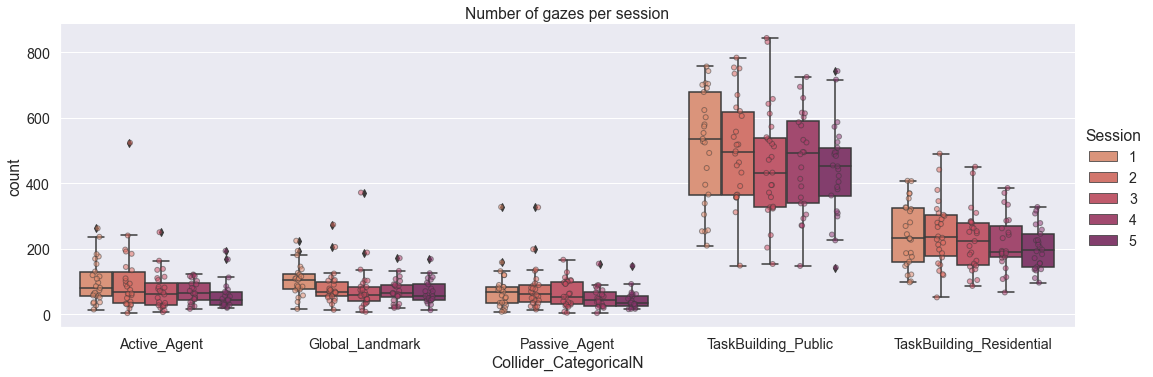

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png')

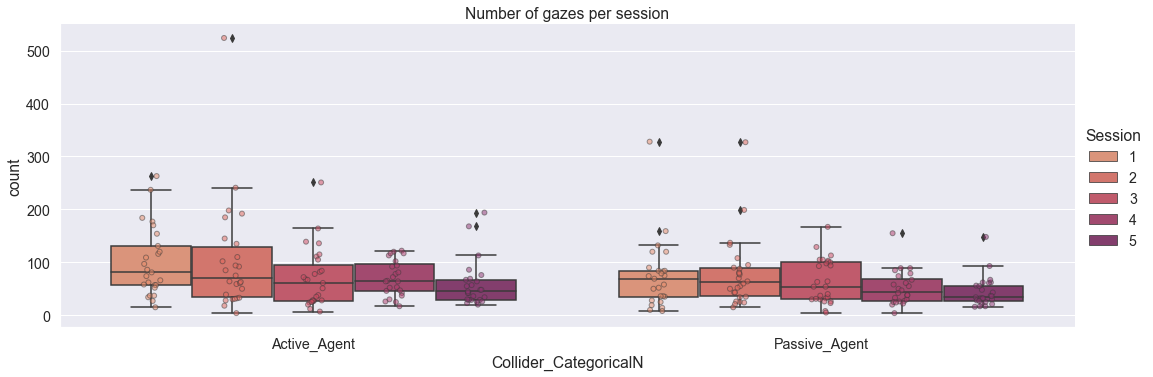

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=3, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=100)
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count_Faces.png')

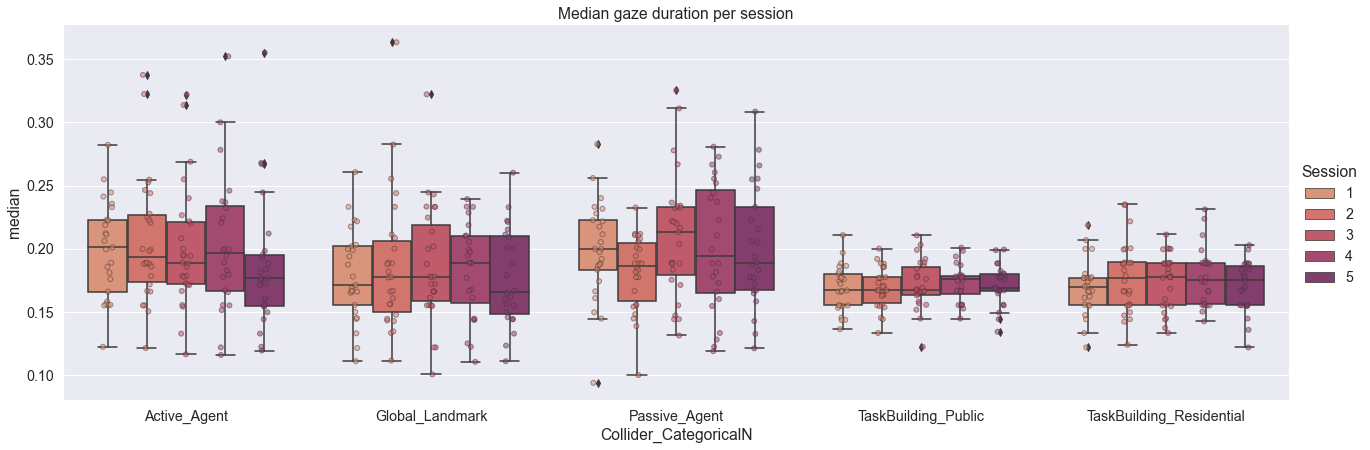

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=6, aspect=3, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/Median_Duration.png')

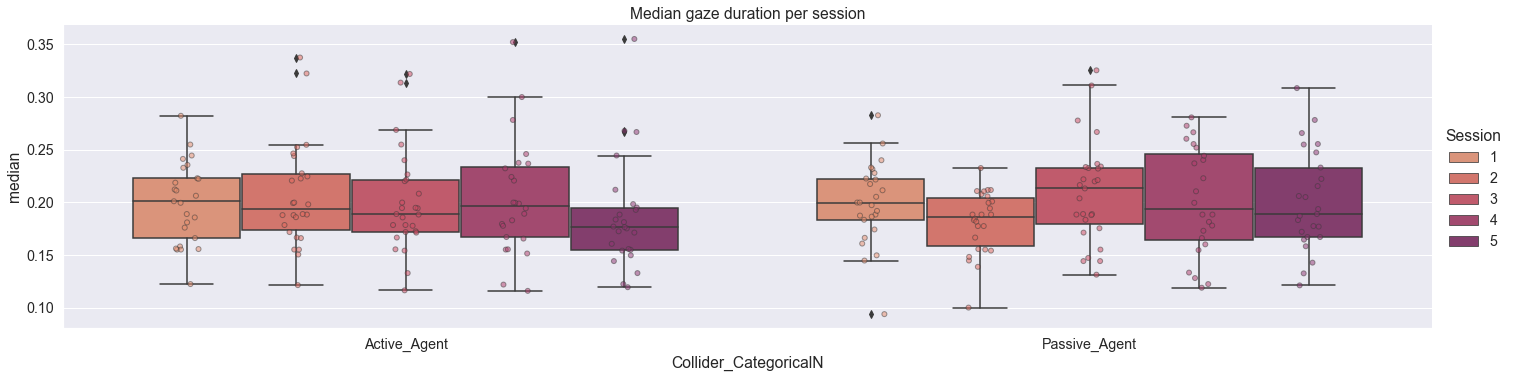

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="median", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
            height=5, aspect=4, kind='box').set(title="Median gaze duration per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="median",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Active_Agent_Face")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent")|(summary_stats_fix_length.Collider_CategoricalN == "Passive_Agent_Face")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/MedianDurationFaces.png')

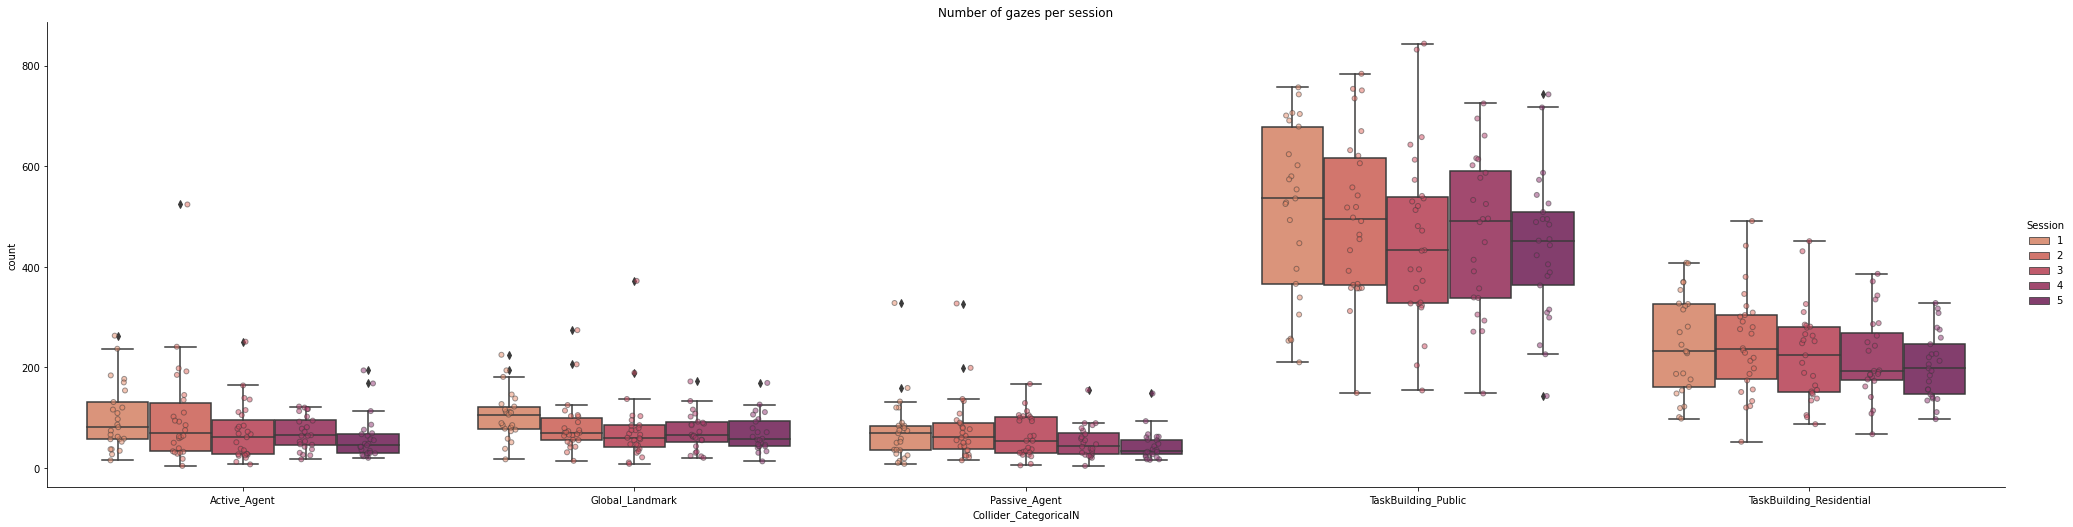

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("flare")
sns.catplot(x="Collider_CategoricalN", y="count", hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
            height=7, aspect=4, kind='box').set(title="Number of gazes per session")
ax = sns.stripplot(x="Collider_CategoricalN", y="count",  hue="Session", data=summary_stats_fix_length[(summary_stats_fix_length.Collider_CategoricalN != "Background")&(summary_stats_fix_length.Collider_CategoricalN != "Building")], \
                   alpha=0.5, dodge=True,linewidth=1,edgecolor='gray')
#plt.ylim(top=1)
ax.get_legend().remove()
plt.savefig('/Users/tracysanchezpacheco/Desktop/count.png')

In [ ]:
HumanA = pd.read_csv("/Users/tracysanchezpacheco/Documents/Resources/humanA_Behavioural.csv")

In [ ]:
HumanA.info()

In [ ]:
data_frame.head(50)

In [ ]:
data_frame.info()

In [ ]:
data_frame.to_csv("/Volumes/SSD/00_Data_Processing/Pre_processed/Complete_Data_AngularV.cvs")

In [ ]:
One_participant.columns

In [ ]:
One_participant.drop(columns=['Unnamed: 0', 'level_0','Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace=True)

In [ ]:
One_participant.events.value_counts()

In [ ]:
One_participant['avg_shift'] = One_participant['avg_dist'].shift(1) != One_participant['avg_dist']

In [ ]:
data_frame.iloc[115318:115322,6:9]

In [ ]:
data_frame.info()

In [ ]:
One_participant.iloc[115521:115532,45:50]

In [ ]:
One_participant.iloc[115318:115322,6]

In [ ]:
One_participant.iloc[115322,6] - One_participant.iloc[115318,6]

In [ ]:
One_participant.iloc[115532,6] - One_participant.iloc[115521,6]

In [ ]:
One_participant.tail(200)

In [ ]:
pd.set_option('display.max_rows', 500)

In [ ]:
import pandas as pd
import numpy as np

# create example dataframe
df = pd.DataFrame({'case': [1, np.nan, np.nan, -1, np.nan, 2, np.nan, np.nan, -2, np.nan, np.nan, np.nan, 2, np.nan, -1]})

# fill NaN values with 0
df_filled = df.fillna(0)

# use boolean indexing to check if the ordering is correct within each group
mask = ((df_filled['case'] != 2) | (df_filled['case'].shift(-1).fillna(0) == -2)) & \
       ((df_filled['case'] != 1) | (df_filled['case'].shift(-1).fillna(0) == -1))

# print rows where the condition is False
print(df[~mask])

In [ ]:
df